### ----------------------------------------------------------------------------------------------------------
## 社会変革型 医療データサイエンティスト育成講座
# Chapter 7: ロジスティック回帰モデルと傾向スコア
### ----------------------------------------------------------------------------------------------------------

#### 1. sklearnを用いたロジスティック回帰モデル構築

In [2]:
# pima indiansデータの読み込み
import pandas as pd

# Jupyter Notebookのホームディレクトリに下記csvファイルを格納してください
filename = "diabetes.csv"

df = pd.read_csv(filename, sep=',',header=0)

# 平均値による欠損値の補完 
imputer_cols = df.columns[[1,2,3,4,5]]
correct_df = df.copy()
for i in imputer_cols:
    correct_df[i] = correct_df[i].mask(df[i]==0, df[i].mean())
    
correct_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


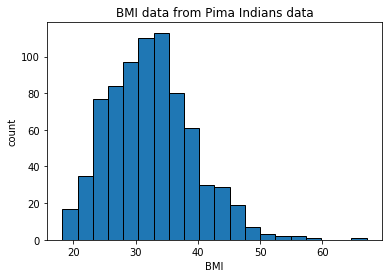

In [3]:
# (参考) BMIデータの確認
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(correct_df['BMI'],bins=20,edgecolor='k')
plt.xlabel('BMI')
plt.ylabel('count')
plt.title('BMI data from Pima Indians data')
plt.show()

In [3]:
# データの前処理
# pandasのcut functionを使用します
BMI_category = pd.cut(correct_df['BMI'],[0,30,100],labels=[0,1])
BMI_category.head()

0    1
1    0
2    0
3    0
4    1
Name: BMI, dtype: category
Categories (2, int64): [0 < 1]

In [4]:
# scikit-learnによるモデル構築
import numpy as np
from sklearn.linear_model import LogisticRegression

# numpyのreshapeを使用して、説明変数を2次元配列に変換
X = np.array(BMI_category).reshape(-1,1)
y = np.array(correct_df['Outcome'])

# 正則化法の適用オプションとして、L1もしくはL2しか選択できません（defaultはL2）
# 正則化を行いたくない場合には、正則化項にかかるハイパーパラメータをゼロに近づける必要があります
# Cを大きな値とすることで、ハイパーパラメータが0に近づきます
logisticModel = LogisticRegression(C=10000)
logisticModel.fit(X,y)

# statsmodelsでのpenalty無しの場合とでは値が異なります
print(logisticModel.coef_[0])

# オッズ比を算出
print('odds ratio = ' + str(np.exp(logisticModel.coef_[0])))

[1.37603247]
odds ratio = [3.95916231]


/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
# BMIを連続値のまま説明変数として使用

X = np.array(correct_df[['BMI']])
y = np.array(correct_df['Outcome'])

logisticModel = LogisticRegression(C=10000)
logisticModel.fit(X,y)
print(logisticModel.coef_[0])
print('odds ratio = ' + str(np.exp(logisticModel.coef_[0])))

[0.1025497]
odds ratio = [1.10799237]


/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
# (参考) statsmodelsを使ったロジスティック回帰モデルの構築

# BMIをカテゴリデータ化
data_BMI_cat = pd.cut(correct_df['BMI'],[0,30,100],labels=[0,1])

# Outcomeを結合
data_BMI_cat = pd.concat([data_BMI_cat,correct_df['Outcome']],axis=1)
data_BMI_cat.head()

,BMI,Outcome
0,1,1
1,0,0
2,0,1
3,0,0
4,1,1


In [7]:
import statsmodels.formula.api as smf

# 説明変数と目的変数の関係を指定し、モデルを構築する
f = 'Outcome ~ BMI'
logitfit = smf.logit(formula=str(f), data=data_BMI_cat).fit()

print(logitfit.summary())

# パラメータは対数オッズ比を表すため、expの肩に乗せることでオッズ比を算出
print('odds ratio = ' + str(np.exp(logitfit.params[1])))

Optimization terminated successfully.
         Current function value: 0.603302
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Jun 2019   Pseudo R-squ.:                 0.06725
Time:                        19:27:38   Log-Likelihood:                -463.34
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 2.986e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5530      0.154    -10.075      0.000      -1.855      -1.251
BMI[T.1]       1.3760      0.

In [8]:
# （参考） BMIを連続変数のまま、説明変数として使用するモデル

# BMIを説明変数として指定
f = 'Outcome ~ BMI'
logitfit = smf.logit(formula=str(f), data=correct_df).fit()

print(logitfit.summary())

Optimization terminated successfully.
         Current function value: 0.596671
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Jun 2019   Pseudo R-squ.:                 0.07750
Time:                        19:27:38   Log-Likelihood:                -458.24
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 1.712e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0190      0.429     -9.363      0.000      -4.860      -3.178
BMI            0.1029      0.

#### 2. 混同行列、ROC曲線とAUC

In [9]:
from sklearn.model_selection import train_test_split

# 説明変数の選択
X = correct_df[['Age','BMI']]
y = correct_df.loc[:, 'Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4)

logisticModel = LogisticRegression()
logisticModel.fit(X_train, y_train)

/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

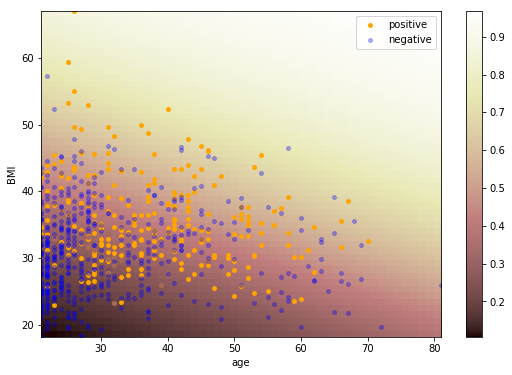

In [10]:
# (参考) 結果の可視化

# 散布図のための関数定義
def plot_scatter(df_pos,df_neg,cols=['Age','BMI'],dsize=10):
    plt.scatter(df_pos[cols[0]],df_pos[cols[1]],
                c='orange',
                s=dsize,
                label='positive',
               )
    plt.scatter(df_neg[cols[0]],df_neg[cols[1]],
                c='blue',
                s=dsize,
                label='negative',
                alpha=0.3, # そのままだとドットが重なって見にくいため、透明度を調整
               )

    plt.xlabel(cols[0])
    plt.ylabel(cols[1])

    # legendを可視化
    plt.legend()

# 変数定義
data_age = correct_df['Age']
data_BMI = correct_df['BMI']
df_pos = correct_df[correct_df['Outcome']==1]
df_neg = correct_df[correct_df['Outcome']==0]

# プロットのための座標を作成します
age = np.linspace(np.min(data_age),np.max(data_age),51)
BMI = np.linspace(np.min(data_BMI),np.max(data_BMI),51)

# age x BMI の２次元平面の各座標において、regressionで求めた関数から陽性率を計算します
prediction = np.zeros([51,51])
for i in range(51):
    for j in range(51):
        prediction[i,j] = logisticModel.predict_proba([[age[i],BMI[j]]])[0,1]

# 陽性率の関数とデータの散布図を同一グラフ上に描画
extent = [np.min(data_age), np.max(data_age), np.min(data_BMI), np.max(data_BMI)]
fig = plt.figure(figsize=[9,6])
ax = fig.add_subplot(1,1,1)
plot_scatter(df_pos,df_neg,dsize=15)
im = ax.imshow(prediction.T,
               extent=extent,
               origin='lower',
               cmap='pink'
              )
ax.set_xlabel('age')
ax.set_ylabel('BMI')
fig.colorbar(im)
plt.show()

              precision    recall  f1-score   support

           1       0.61      0.26      0.37        65
           0       0.71      0.91      0.80       127

   micro avg       0.69      0.69      0.69       192
   macro avg       0.66      0.59      0.58       192
weighted avg       0.67      0.69      0.65       192



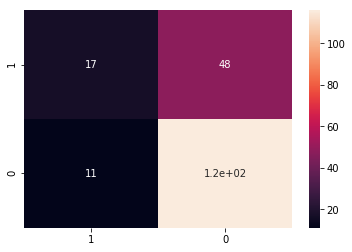

In [11]:
# 混同行列、classification_reportの確認
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = logisticModel.predict(X_test)
labels = [1,0]
print(classification_report(y_test, y_pred, labels=labels))

# 混同行列
# 左上は真陽性(true positive)、右下は真陰性(true negative)、
# 左下は偽陽性(false positive)、右上は偽陰性(false negative)
conf_mtx = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(conf_mtx, annot=True, xticklabels=labels, yticklabels=labels)
plt.show()

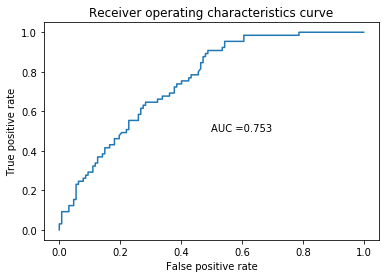

In [12]:
# ROC curve, およびarea under the curve (AUC) の計算
from sklearn.metrics import roc_curve, auc

# テストデータを使用してROC curveを計算するために、まずはテストデータの
# 各点における陽性率を、LogisticRegression.predict_proba関数を使用して計算します
prob_positive = logisticModel.predict_proba(X_test)[:,1]

# 次に、上で求めた真陽性率と、各点の真のOutcomeの値を使用して、
# 様々なthresholdsにおける真陽性率と偽陽性率を計算します
fpr, tpr, thresholds = roc_curve(y_test, prob_positive)

# ROC curveのarea under the curveを計算
roc_auc = auc(fpr, tpr)
s = 'AUC =' + str(np.round(roc_auc,3)) # 値を四捨五入し、文字列に変換しておく

# 実際にROC curveを描いてみます
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristics curve')
plt.text(0.5,0.5,s) # plotの中にAUCを書きます。最初の二つの数字はテキストの開始位置を示しています
plt.show()